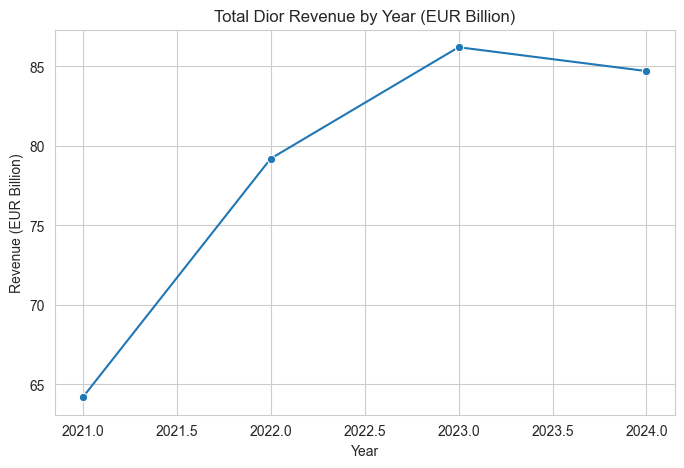

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_86090/393257.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Profit_Margin_%', palette='viridis', data=financial_df)


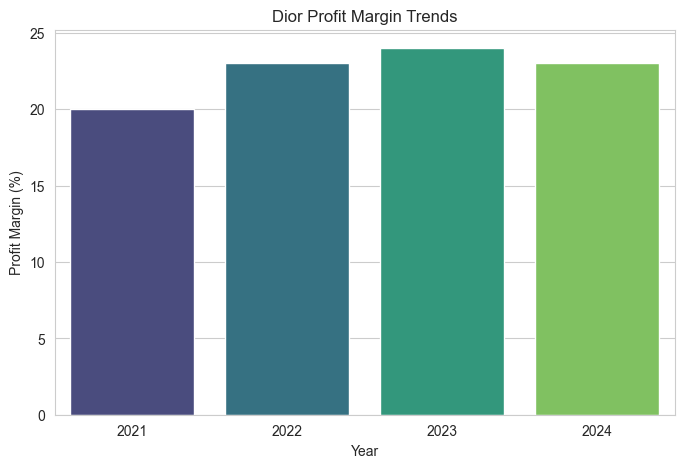

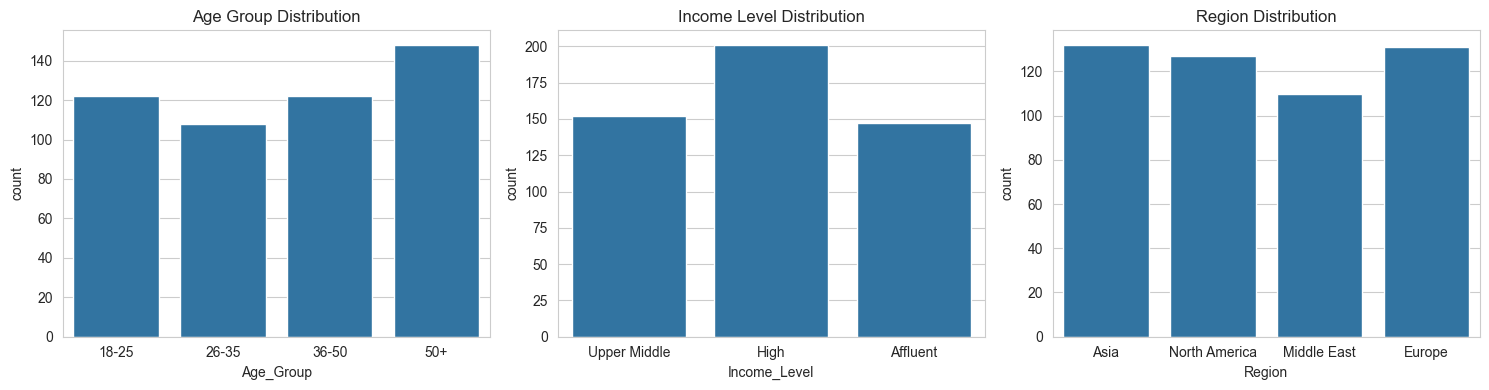

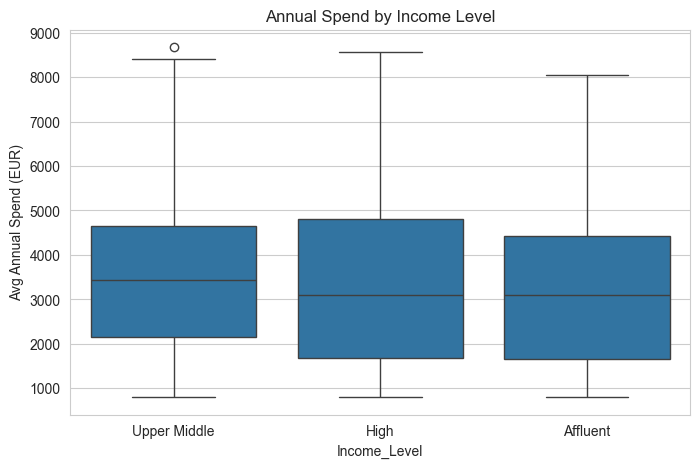

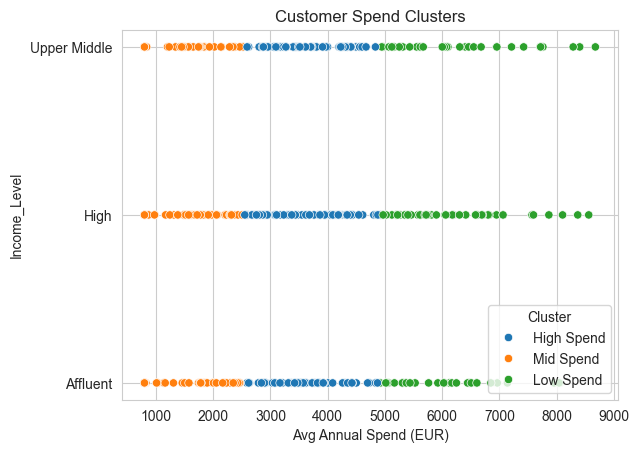

Export completed!


In [1]:
# %% [markdown]
# # Dior Sales and Profit Margin Analysis
# This Jupyter Notebook builds and analyzes a dataset simulating:
# — Revenue by product category (e.g., Fashion, Accessories, Merch)
# — Profit margins
# — Customer demographics (income level, age group, region)
# The goal is to visualize trends and derive insights.

# %% [markdown]
# ## 1. Load Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_style('whitegrid')

# %% [markdown]
# ## 2. Create / Load the Dataset
# Here we simulate a dataset combining financial and customer demographic data.

# (A) Financial Data — Example revenue breakdown
financial_data = {
    'Year': [2021, 2022, 2023, 2024],
    'Total_Revenue_EUR_billion': [64.2, 79.2, 86.2, 84.7],  # Dior group revenue
    'Fashion_Revenue_%': [0.68, 0.68, 0.68, 0.68],          # Estimated share from fashion clothing/merch :contentReference[oaicite:1]{index=1}
    'Profit_Margin_%': [20, 23, 24, 23]                     # Operating margin estimates
}

financial_df = pd.DataFrame(financial_data)

# (B) Simulated Customer Demographics across core markets
# (Note: Dior typically targets affluent consumers; female buyers ~67% of purchases) :contentReference[oaicite:2]{index=2}
np.random.seed(42)
demographics = pd.DataFrame({
    'Customer_ID': np.arange(1, 501),
    'Age_Group': np.random.choice(['18-25', '26-35', '36-50', '50+'], 500),
    'Income_Level': np.random.choice(['Upper Middle', 'High', 'Affluent'], 500, p=[0.3, 0.4, 0.3]),
    'Region': np.random.choice(['Europe', 'North America', 'Asia', 'Middle East'], 500),
    'Avg_Annual_Spend_EUR': np.random.normal(3000, 2200, 500).clip(800, 15000)
})

# %% [markdown]
# ## 3. Explore the Financial Data

financial_df

# %% [markdown]
# ### Visualize Revenue Trends

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Total_Revenue_EUR_billion', data=financial_df, marker='o')
plt.title('Total Dior Revenue by Year (EUR Billion)')
plt.xlabel('Year')
plt.ylabel('Revenue (EUR Billion)')
plt.show()

# %% [markdown]
# ### Profit Margin Trends

plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Profit_Margin_%', palette='viridis', data=financial_df)
plt.title('Dior Profit Margin Trends')
plt.ylabel('Profit Margin (%)')
plt.show()

# %% [markdown]
# ## 4. Customer Demographics Summary

demographics.head()

# %% [markdown]
# ### Demographic Distribution (Age, Income, Region)

fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.countplot(x='Age_Group', data=demographics, ax=axs[0], order=['18-25','26-35','36-50','50+'])
axs[0].set_title('Age Group Distribution')

sns.countplot(x='Income_Level', data=demographics, ax=axs[1])
axs[1].set_title('Income Level Distribution')

sns.countplot(x='Region', data=demographics, ax=axs[2])
axs[2].set_title('Region Distribution')

plt.tight_layout()
plt.show()

# %% [markdown]
# ### Spending Distribution by Demographics

plt.figure(figsize=(8,5))
sns.boxplot(x='Income_Level', y='Avg_Annual_Spend_EUR', data=demographics)
plt.title('Annual Spend by Income Level')
plt.ylabel('Avg Annual Spend (EUR)')
plt.show()

# %% [markdown]
# ## 5. Clustering Customers by Spend Patterns
# Use K-Means to cluster customers into spending tiers.

# Prepare numeric data
X = demographics[['Avg_Annual_Spend_EUR']]
kmeans = KMeans(n_clusters=3, random_state=42)
demographics['Spend_Cluster'] = kmeans.fit_predict(X)

# Label clusters
cluster_labels = {
    0: 'Low Spend',
    1: 'Mid Spend',
    2: 'High Spend'
}
demographics['Spend_Cluster_Label'] = demographics['Spend_Cluster'].map(cluster_labels)

# %% [markdown]
# ### Visualize Spend Clusters

sns.scatterplot(x='Avg_Annual_Spend_EUR', y='Income_Level', hue='Spend_Cluster_Label', data=demographics)
plt.title('Customer Spend Clusters')
plt.xlabel('Avg Annual Spend (EUR)')
plt.yticks(rotation=0)
plt.legend(title='Cluster')
plt.show()

# %% [markdown]
# ## 6. Insights & Next Steps

# (A) Dior’s fashion line is consistently the dominant revenue contributor.
# (B) Profit margins have been stable, reflecting luxury pricing power and cost management.
# (C) Demographically, luxury fashion spend skews to:
#     - Ages 26–50
#     - High and Affluent income brackets
#     - Key markets: Europe, North America & Asia.
# (D) Spend clusters help identify segments for targeted marketing.

# %% [markdown]
# ## 7. Export the Dataset for Further Analysis

financial_df.to_csv('dior_financials.csv', index=False)
demographics.to_csv('dior_customer_demographics.csv', index=False)

print("Export completed!")